# Pandas

* filtering
* sorting
* usefull methods
* groupby
* merge

In [1]:
import pandas as pd
from datetime import datetime

# defines the data as a list of dictionaries with 10 student records

students_data = [
    {'roll_no': 1, 'name': 'Alice', 'father': 'Bob', 'course': 'Physics', 'date_of_admission': '2023-01-10', 'fee': 10000},
    {'roll_no': 2, 'name': 'Brian', 'father': 'Steve', 'course': 'Chemistry', 'date_of_admission': '2023-02-12', 'fee': 11000},
    {'roll_no': 3, 'name': 'Chloe', 'father': 'Tim', 'course': 'Biology', 'date_of_admission': '2023-03-14', 'fee': 12000},
    {'roll_no': 4, 'name': 'David', 'father': 'Rick', 'course': 'Mathematics', 'date_of_admission': '2023-04-10', 'fee': 13000},
    {'roll_no': 5, 'name': 'Eva', 'father': 'John', 'course': 'Computer Science', 'date_of_admission': '2023-05-16', 'fee': 14000},
    {'roll_no': 6, 'name': 'Frank', 'father': 'Tom', 'course': 'Economics', 'date_of_admission': '2023-06-21', 'fee': 15000},
    {'roll_no': 7, 'name': 'Grace', 'father': 'Harry', 'course': 'History', 'date_of_admission': '2023-07-25', 'fee': 16000},
    {'roll_no': 8, 'name': 'Henry', 'father': 'Charles', 'course': 'Geography', 'date_of_admission': '2023-08-17', 'fee': 17000},
    {'roll_no': 9, 'name': 'Isabel', 'father': 'Oliver', 'course': 'English', 'date_of_admission': '2023-09-10', 'fee': 18000},
    {'roll_no': 10, 'name': 'Jack', 'father': 'Noah', 'course': 'Art', 'date_of_admission': '2023-10-05', 'fee': 19000},
]

# create the DataFrame

students_df: pd.DataFrame = pd.DataFrame(students_data)

# convert `date_of_admission` to datetime

students_df['date_of_admission'] = pd.to_datetime(students_df['date_of_admission'])

# show the DataFrame

display(students_df)

# Verify the data types

display(students_df.info())

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,Mathematics,2023-04-10,13000
4,5,Eva,John,Computer Science,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   roll_no            10 non-null     int64         
 1   name               10 non-null     object        
 2   father             10 non-null     object        
 3   course             10 non-null     object        
 4   date_of_admission  10 non-null     datetime64[ns]
 5   fee                10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 612.0+ bytes


None

In [2]:
import pandera as pa
from pandera.typing import Series
from datetime import datetime
import pandas as pd

# define the schema using schema model

class StudentSchema(pa.DataFrameModel):
    roll_no: Series[int] = pa.Field(ge=1)
    name: Series[str] = pa.Field(nullable=False)
    father: Series[str] = pa.Field(nullable=False)
    course: Series[str] = pa.Field(nullable=False)
    date_of_admission: Series[datetime] = pa.Field(le=datetime.now())
    fee: Series[int] = pa.Field(ge=0)
    
    class Config:
        coerce = True     # Automatically coerce types if possible
        strict = True     # Ensure all columns are accounted for in the schema
        
# data for 10 students
students_data = [
    {'roll_no': 1, 'name': 'Alice', 'father': 'Bob', 'course': 'Physics', 'date_of_admission': '2023-01-10', 'fee': 10000},
    {'roll_no': 2, 'name': 'Brian', 'father': 'Steve', 'course': 'Chemistry', 'date_of_admission': '2023-02-12', 'fee': 11000},
    {'roll_no': 3, 'name': 'Chloe', 'father': 'Tim', 'course': 'Biology', 'date_of_admission': '2023-03-14', 'fee': 12000},
    {'roll_no': 4, 'name': 'David', 'father': 'Rick', 'course': 'Physics', 'date_of_admission': '2023-04-10', 'fee': 13000},
    {'roll_no': 5, 'name': 'Eva', 'father': 'John', 'course': 'Physics', 'date_of_admission': '2023-05-16', 'fee': 14000},
    {'roll_no': 6, 'name': 'Frank', 'father': 'Tom', 'course': 'Economics', 'date_of_admission': '2023-06-21', 'fee': 15000},
    {'roll_no': 7, 'name': 'Grace', 'father': 'Harry', 'course': 'History', 'date_of_admission': '2023-07-25', 'fee': 16000},
    {'roll_no': 8, 'name': 'Henry', 'father': 'Charles', 'course': 'Geography', 'date_of_admission': '2023-08-17', 'fee': 17000},
    {'roll_no': 9, 'name': 'Isabel', 'father': 'Oliver', 'course': 'English', 'date_of_admission': '2023-09-10', 'fee': 18000},
    {'roll_no': 10, 'name': 'Jack', 'father': 'Noah', 'course': 'Art', 'date_of_admission': '2023-10-05', 'fee': 19000},
]

# create the dataframe
students_df = pd.DataFrame(students_data)

# convert 'date_of_admission' to datetime
students_df['date_of_admission'] = pd.to_datetime(students_df['date_of_admission'])

# validate the dataframe

validated_df = StudentSchema.validate(students_df)

print(validated_df)

   roll_no    name   father     course date_of_admission    fee
0        1   Alice      Bob    Physics        2023-01-10  10000
1        2   Brian    Steve  Chemistry        2023-02-12  11000
2        3   Chloe      Tim    Biology        2023-03-14  12000
3        4   David     Rick    Physics        2023-04-10  13000
4        5     Eva     John    Physics        2023-05-16  14000
5        6   Frank      Tom  Economics        2023-06-21  15000
6        7   Grace    Harry    History        2023-07-25  16000
7        8   Henry  Charles  Geography        2023-08-17  17000
8        9  Isabel   Oliver    English        2023-09-10  18000
9       10    Jack     Noah        Art        2023-10-05  19000


c:\Users\Netever\anaconda3\envs\python12\Lib\site-packages\pandera\_pandas_deprecated.py:157: FutureWarning: Importing pandas-specific classes and functions from the
top-level pandera module will be **removed in a future version of pandera**.
If you're using pandera to validate pandas objects, we highly recommend updating
your import:

```
# old import
import pandera as pa

# new import
import pandera.pandas as pa
```

If you're using pandera to validate objects from other compatible libraries
like pyspark or polars, see the supported libraries section of the documentation
for more information on how to import pandera:

https://pandera.readthedocs.io/en/stable/supported_libraries.html

To disable this warning, set the environment variable:

```
export DISABLE_PANDERA_IMPORT_WARNING=True
```

  warnings.warn(_future_warning, FutureWarning)


## Apply the filter or filter functions on dataframe

In [3]:
students_df.head(1)

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000


In [4]:
students_df.course.value_counts()

course
Physics      3
Chemistry    1
Biology      1
Economics    1
History      1
Geography    1
English      1
Art          1
Name: count, dtype: int64

In [5]:
students_df.course.value_counts(dropna=False)    # also counts null cell values

course
Physics      3
Chemistry    1
Biology      1
Economics    1
History      1
Geography    1
English      1
Art          1
Name: count, dtype: int64

In [6]:
students_df.course.value_counts(dropna=False, normalize=True)    # also counts null cell values

course
Physics      0.3
Chemistry    0.1
Biology      0.1
Economics    0.1
History      0.1
Geography    0.1
English      0.1
Art          0.1
Name: proportion, dtype: float64

In [7]:
students_df.course.value_counts(dropna=False, normalize=True)*100    # also counts null cell values

course
Physics      30.0
Chemistry    10.0
Biology      10.0
Economics    10.0
History      10.0
Geography    10.0
English      10.0
Art          10.0
Name: proportion, dtype: float64

In [8]:
students_df

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,Physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000


In [9]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# set a seed for reproducibility

np.random.seed(0)

# define the number of transactions

num_trancsactions = 1000

# generate random dates within the current year

current_year = datetime.now().year
strat_date = datetime(current_year, 1, 1)
end_date = datetime.now()

# generate a list of random dates within the year

random_dates = [strat_date + timedelta(days=np.random.randint(0, (end_date - strat_date).days)) for _ in range(num_trancsactions)]

# generate a list of random fee accounts

random_fees = np.random.randint(low=0, high=5000, size=num_trancsactions)

# create the dataframe

fee_transactions = pd.DataFrame({
    'date': random_dates,
    'fee': random_fees
})

# sort by date for readability

fee_transactions.sort_values('date', inplace=True)

# reset index after sorting

fee_transactions.reset_index(drop=True, inplace=True)

print(fee_transactions)

          date   fee
0   2025-01-01    24
1   2025-01-01  1356
2   2025-01-01  3751
3   2025-01-01  1681
4   2025-01-01  3642
..         ...   ...
995 2025-06-21  3406
996 2025-06-21  3441
997 2025-06-21  1365
998 2025-06-21  3599
999 2025-06-21  1909

[1000 rows x 2 columns]


In [10]:
pd.cut(fee_transactions.fee, [1, 500, 1000, 3000, 4000, 5000])

0          (1, 500]
1      (1000, 3000]
2      (3000, 4000]
3      (1000, 3000]
4      (3000, 4000]
           ...     
995    (3000, 4000]
996    (3000, 4000]
997    (1000, 3000]
998    (3000, 4000]
999    (1000, 3000]
Name: fee, Length: 1000, dtype: category
Categories (5, interval[int64, right]): [(1, 500] < (500, 1000] < (1000, 3000] < (3000, 4000] < (4000, 5000]]

In [11]:
pd.cut(fee_transactions.fee, [1, 500, 1000, 3000, 4000, 5000]).value_counts()

fee
(1000, 3000]    427
(3000, 4000]    201
(4000, 5000]    186
(1, 500]        106
(500, 1000]      80
Name: count, dtype: int64

In [12]:
pd.cut(fee_transactions.fee, [1, 500, 1000, 3000, 4000, 5000]).value_counts(normalize=True)*100

fee
(1000, 3000]    42.7
(3000, 4000]    20.1
(4000, 5000]    18.6
(1, 500]        10.6
(500, 1000]      8.0
Name: proportion, dtype: float64

In [13]:
pd.qcut(fee_transactions.fee, [0.3, .5, .7, .9, 1])

0                     NaN
1                     NaN
2        (3479.5, 4441.0]
3      (1536.099, 2405.5]
4        (3479.5, 4441.0]
              ...        
995      (2405.5, 3479.5]
996      (2405.5, 3479.5]
997                   NaN
998      (3479.5, 4441.0]
999    (1536.099, 2405.5]
Name: fee, Length: 1000, dtype: category
Categories (4, interval[float64, right]): [(1536.099, 2405.5] < (2405.5, 3479.5] < (3479.5, 4441.0] < (4441.0, 4997.0]]

In [14]:
pd.qcut(fee_transactions.fee, [0.3, .5, .7, .9, 1]).value_counts()

fee
(1536.099, 2405.5]    200
(2405.5, 3479.5]      200
(3479.5, 4441.0]      200
(4441.0, 4997.0]      100
Name: count, dtype: int64

In [15]:
pd.qcut(fee_transactions.fee, [0.3, .5, .7, .9, 1]).value_counts(normalize=True)*100

fee
(1536.099, 2405.5]    28.571429
(2405.5, 3479.5]      28.571429
(3479.5, 4441.0]      28.571429
(4441.0, 4997.0]      14.285714
Name: proportion, dtype: float64

In [16]:
students_df.head()

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,Physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000


## filter on cloumns

* $, |, ~ Syntax

dataframe[(dataframe.column1='value1') & (dataframe.column2='value2')]

* string columns
* numeric columns
* datetime columns

In [17]:
import pandera as pa
from pandera.typing import Series
from datetime import datetime
import pandas as pd

# define the schema using schema model

class StudentSchema(pa.DataFrameModel):
    roll_no: Series[int] = pa.Field(ge=1)
    name: Series[str] = pa.Field(nullable=False)
    father: Series[str] = pa.Field(nullable=False)
    course: Series[str] = pa.Field(nullable=False)
    date_of_admission: Series[datetime] = pa.Field(le=datetime.now())
    fee: Series[int] = pa.Field(ge=0)
    
    class Config:
        coerce = True     # Automatically coerce types if possible
        strict = True     # Ensure all columns are accounted for in the schema
        
# data for 10 students
students_data = [
    {'roll_no': 1, 'name': 'Alice', 'father': 'Bob', 'course': 'Physics', 'date_of_admission': '2023-01-10', 'fee': 10000},
    {'roll_no': 2, 'name': 'Brian', 'father': 'Steve', 'course': 'Chemistry', 'date_of_admission': '2023-02-12', 'fee': 11000},
    {'roll_no': 3, 'name': 'Chloe', 'father': 'Tim', 'course': 'Biology', 'date_of_admission': '2023-03-14', 'fee': 12000},
    {'roll_no': 4, 'name': 'David', 'father': 'Rick', 'course': 'physics', 'date_of_admission': '2023-04-10', 'fee': 13000},
    {'roll_no': 5, 'name': 'Eva', 'father': 'John', 'course': 'Physics', 'date_of_admission': '2023-05-16', 'fee': 14000},
    {'roll_no': 6, 'name': 'Frank', 'father': 'Tom', 'course': 'Economics', 'date_of_admission': '2023-06-21', 'fee': 15000},
    {'roll_no': 7, 'name': 'Grace', 'father': 'Harry', 'course': 'History', 'date_of_admission': '2023-07-25', 'fee': 16000},
    {'roll_no': 8, 'name': 'Henry', 'father': 'Charles', 'course': 'Geography', 'date_of_admission': '2023-08-17', 'fee': 17000},
    {'roll_no': 9, 'name': 'Isabel', 'father': 'Oliver', 'course': 'English', 'date_of_admission': '2023-09-10', 'fee': 18000},
    {'roll_no': 10, 'name': 'Jack', 'father': 'Noah', 'course': 'Art', 'date_of_admission': '2023-10-05', 'fee': 19000},
]

# create the dataframe
students_df = pd.DataFrame(students_data)

# convert 'date_of_admission' to datetime
students_df['date_of_admission'] = pd.to_datetime(students_df['date_of_admission'])

# validate the dataframe

validated_df = StudentSchema.validate(students_df)

print(validated_df)

   roll_no    name   father     course date_of_admission    fee
0        1   Alice      Bob    Physics        2023-01-10  10000
1        2   Brian    Steve  Chemistry        2023-02-12  11000
2        3   Chloe      Tim    Biology        2023-03-14  12000
3        4   David     Rick    physics        2023-04-10  13000
4        5     Eva     John    Physics        2023-05-16  14000
5        6   Frank      Tom  Economics        2023-06-21  15000
6        7   Grace    Harry    History        2023-07-25  16000
7        8   Henry  Charles  Geography        2023-08-17  17000
8        9  Isabel   Oliver    English        2023-09-10  18000
9       10    Jack     Noah        Art        2023-10-05  19000


In [18]:
students_df.head(10)

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000


In [19]:
students_df['course'] == 'Physics'

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [20]:
students_df[students_df['course'] == 'Physics']

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
4,5,Eva,John,Physics,2023-05-16,14000


In [21]:
students_df['course'].str.lower() == 'physics'

0     True
1    False
2    False
3     True
4     True
5    False
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [22]:
students_df[students_df['course'].str.lower() == 'physics']

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
3,4,David,Rick,physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000


In [23]:
students_df['course'].str.lower().str.contains('cs')

0     True
1    False
2    False
3     True
4     True
5     True
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [24]:
students_df[students_df['course'].str.lower().str.contains('cs')]

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
3,4,David,Rick,physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000


In [25]:
students_df[(students_df['course'].str.lower().str.contains('cs')) & (students_df['fee'] >= 14000)]

,roll_no,name,father,course,date_of_admission,fee
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000


In [26]:
students_df['course'].str.lower().str.contains('cs') & students_df['course'].str.lower().str.contains('r')

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: course, dtype: bool

In [27]:
students_df['course'].str.lower().str.contains('cs') | students_df['course'].str.lower().str.contains('r')

0     True
1     True
2    False
3     True
4     True
5     True
6     True
7     True
8    False
9     True
Name: course, dtype: bool

In [28]:
students_df[students_df['course'].str.lower().str.contains('cs') | students_df['course'].str.lower().str.contains('r')]

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
3,4,David,Rick,physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
9,10,Jack,Noah,Art,2023-10-05,19000


In [29]:
import pandera as pa
from pandera.typing import Series
from datetime import datetime
import pandas as pd

# define the schema using schema model

class StudentSchema(pa.DataFrameModel):
    roll_no: Series[int] = pa.Field(ge=1)
    name: Series[str] = pa.Field(nullable=False)
    father: Series[str] = pa.Field(nullable=False)
    course: Series[str] = pa.Field(nullable=False)
    date_of_admission: Series[datetime] = pa.Field(le=datetime.now())
    fee: Series[int] = pa.Field(ge=0)
    
    class Config:
        coerce = True     # Automatically coerce types if possible
        strict = True     # Ensure all columns are accounted for in the schema
        
# data for 10 students
students_data = [
    {'roll_no': 1, 'name': 'Alice', 'father': 'Bob', 'course': 'Physics', 'date_of_admission': '2023-01-10', 'fee': 10000},
    {'roll_no': 2, 'name': 'Brian', 'father': 'Steve', 'course': 'Chemistry', 'date_of_admission': '2023-02-12', 'fee': 11000},
    {'roll_no': 3, 'name': 'Chloe', 'father': 'Tim', 'course': 'Biology', 'date_of_admission': '2023-03-14', 'fee': 12000},
    {'roll_no': 4, 'name': 'David', 'father': 'Rick', 'course': 'physics', 'date_of_admission': '2023-04-10', 'fee': 13000},
    {'roll_no': 5, 'name': 'Eva', 'father': 'John', 'course': 'Physics', 'date_of_admission': '2023-05-16', 'fee': 14000},
    {'roll_no': 6, 'name': 'Frank', 'father': 'Tom', 'course': 'Economics', 'date_of_admission': '2023-06-21', 'fee': 15000},
    {'roll_no': 7, 'name': 'Grace', 'father': 'Harry', 'course': 'History', 'date_of_admission': '2023-07-25', 'fee': 16000},
    {'roll_no': 8, 'name': 'Henry', 'father': 'Charles', 'course': 'Geography', 'date_of_admission': '2023-08-17', 'fee': 17000},
    {'roll_no': 9, 'name': 'Isabel', 'father': 'Oliver', 'course': 'English', 'date_of_admission': '2023-09-10', 'fee': 18000},
    {'roll_no': 10, 'name': 'Jack', 'father': 'Noah', 'course': 'Art', 'date_of_admission': '2023-10-05', 'fee': 19000},
]

# create the dataframe
students_df = pd.DataFrame(students_data)

# convert 'date_of_admission' to datetime
students_df['date_of_admission'] = pd.to_datetime(students_df['date_of_admission'])

# validate the dataframe

validated_df = StudentSchema.validate(students_df)

print(validated_df)

   roll_no    name   father     course date_of_admission    fee
0        1   Alice      Bob    Physics        2023-01-10  10000
1        2   Brian    Steve  Chemistry        2023-02-12  11000
2        3   Chloe      Tim    Biology        2023-03-14  12000
3        4   David     Rick    physics        2023-04-10  13000
4        5     Eva     John    Physics        2023-05-16  14000
5        6   Frank      Tom  Economics        2023-06-21  15000
6        7   Grace    Harry    History        2023-07-25  16000
7        8   Henry  Charles  Geography        2023-08-17  17000
8        9  Isabel   Oliver    English        2023-09-10  18000
9       10    Jack     Noah        Art        2023-10-05  19000


## apply filter on date column

* dataframe.column.dt
* dt.strftime
* dt.strptime

In Pandas, when you have a `datetime` column in a DataFrame, you can format the date and time information using the `strftime` method which allows for flexible formatting by specifyings format codes. Each code represents a different element of the date and time. Below are some of the commonly used format codes that you can use with `strftime`.

```
`%a`- Abbreviated weekday name.
`%A`- Full weekday name.
`%w`- Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.
`%d`- Day of the month as a zero-padded decimal number.
`%b`- Abbreviated month name.
`%B`- Full month name.
`%m`- Month as a zero-padded decimal number.
`%y`- Year without century as a zero-padded decimal number.
`%Y`- Year with century as a decimal number.
`%H`- Hour (24-hour clock) as a zero-padded decimal number.
`%I`- Hour (12-hour clock) as a zero-padded decimal number.
`%p`- Locale’s equivalent of either AM or PM.
`%M`- Minute as a zero-padded decimal number.
`%S`- Second as a zero-padded decimal number.
`%f`- Microsecond as a decimal number, zero-padded on the left.
`%z`- UTC offset in the form ±HHMM[SS[.ffffff]] (empty string if the object is naive).
`%Z`- Time zone name (empty string if the object is naive).
`%j`- Day of the year as a zero-padded decimal number.
`%U`- Week number of the year (Sunday as the first day of the week) as a zero-padded decimal number.
`%W`- Week number of the year (Monday as the first day of the week) as a zero-padded decimal number.
`%c`- Locale’s appropriate date and time representation.
`%x`- Locale’s appropriate date representation.
`%X`- Locale’s appropriate time representation.
`%G`- ISO 8601 year with century representing the year that contains the greater part of the ISO week (`%V`).
`%u`- ISO 8601 weekday as a decimal number where 1 is Monday.
`%V`- ISO 8601 week number as a decimal number with Monday as the first day of the week.
```
Here's a small example of how to use `strftime` with a pandas DataFrame.

```
import pandas as pd

# create a sample DataFrame with datetime column

df = pd.DataFrame({
    'datetime': pd.date_range(start='2025-01-01', periods=3, freq='D')
})

# format the `datetime` column as a string with a specific format.

df['formatted_date'] = df['datetime'].dt.strftime('%Y-%m-%d %H-%M-%S')

print(df)
```

The `formatted_date` column will contain string representing the dates in the format specific by the `strftime` method. You can combine any of the symbols above to create the date format string as per your requirements.

In [30]:
students_df['date_of_admission']

0   2023-01-10
1   2023-02-12
2   2023-03-14
3   2023-04-10
4   2023-05-16
5   2023-06-21
6   2023-07-25
7   2023-08-17
8   2023-09-10
9   2023-10-05
Name: date_of_admission, dtype: datetime64[ns]

In [31]:
students_df['date_of_admission'].dt.year
students_df['date_of_admission'].dt.month
students_df['date_of_admission'].dt.day
students_df['date_of_admission'].dt.weekday
students_df['date_of_admission'].dt.day_of_week
students_df['date_of_admission'].dt.hour
students_df['date_of_admission'].dt.minute
students_df['date_of_admission'].dt.second
students_df['date_of_admission'].dt.microsecond
students_df['date_of_admission'].dt.tz
students_df['date_of_admission'].dt.tz_localize
students_df['date_of_admission'].dt.tz_convert
students_df['date_of_admission'].dt.tz_localize(None)

0   2023-01-10
1   2023-02-12
2   2023-03-14
3   2023-04-10
4   2023-05-16
5   2023-06-21
6   2023-07-25
7   2023-08-17
8   2023-09-10
9   2023-10-05
Name: date_of_admission, dtype: datetime64[ns]

In [32]:
[i for i in dir(students_df['date_of_admission'].dt) if '_' not in i]

['ceil',
 'date',
 'day',
 'dayofweek',
 'dayofyear',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'nanosecond',
 'normalize',
 'quarter',
 'round',
 'second',
 'strftime',
 'time',
 'timetz',
 'tz',
 'unit',
 'weekday',
 'year']

In [33]:
from datetime import datetime

date: datetime = datetime.now()

date

datetime.datetime(2025, 6, 22, 22, 27, 24, 487923)

In [34]:
s1: Series = pd.Series([date])

s1

0   2025-06-22 22:27:24.487923
dtype: datetime64[ns]

In [35]:
s1.dt.strftime('%Y/%m $d %I %b %B')    # convert from date to text

0    2025/06 $d 10 Jun June
dtype: object

In [36]:
s2: Series = pd.Series(['01 Nov 2023', '01 Nov 2024', '01 Jan 2025'])

s2

0    01 Nov 2023
1    01 Nov 2024
2    01 Jan 2025
dtype: object

In [37]:
s2.apply(lambda x: datetime.strptime(x, '%d %b %Y'))    # string to datetime

0   2023-11-01
1   2024-11-01
2   2025-01-01
dtype: datetime64[ns]

## Groupby

* dataframe.groupby(['column1', 'column2'])
* dataframe.groupby(['column1', 'column2'])[['col1', 'col2']].aggregated(['min', 'max'])
* dataframe.groupby(['column1', 'column2'])[['col1', 'col2']].apply(function())

In [38]:
import pandera as pa
from pandera.typing import Series
from datetime import datetime
import pandas as pd

# define the schema using schema model

class StudentSchema(pa.DataFrameModel):
    roll_no: Series[int] = pa.Field(ge=1)
    name: Series[str] = pa.Field(nullable=False)
    father: Series[str] = pa.Field(nullable=False)
    course: Series[str] = pa.Field(nullable=False)
    date_of_admission: Series[datetime] = pa.Field(le=datetime.now())
    fee: Series[int] = pa.Field(ge=0)
    
    class Config:
        coerce = True     # Automatically coerce types if possible
        strict = True     # Ensure all columns are accounted for in the schema
        
# data for 10 students
students_data = [
    {'roll_no': 1, 'name': 'Alice', 'father': 'Bob', 'course': 'Physics', 'date_of_admission': '2023-01-10', 'fee': 10000},
    {'roll_no': 2, 'name': 'Brian', 'father': 'Steve', 'course': 'Chemistry', 'date_of_admission': '2023-02-12', 'fee': 11000},
    {'roll_no': 3, 'name': 'Chloe', 'father': 'Tim', 'course': 'Biology', 'date_of_admission': '2023-03-14', 'fee': 12000},
    {'roll_no': 4, 'name': 'David', 'father': 'Rick', 'course': 'physics', 'date_of_admission': '2023-04-10', 'fee': 13000},
    {'roll_no': 5, 'name': 'Eva', 'father': 'John', 'course': 'Physics', 'date_of_admission': '2023-05-16', 'fee': 14000},
    {'roll_no': 6, 'name': 'Frank', 'father': 'Tom', 'course': 'Economics', 'date_of_admission': '2023-06-21', 'fee': 15000},
    {'roll_no': 7, 'name': 'Grace', 'father': 'Harry', 'course': 'History', 'date_of_admission': '2023-07-25', 'fee': 16000},
    {'roll_no': 8, 'name': 'Henry', 'father': 'Charles', 'course': 'Geography', 'date_of_admission': '2023-08-17', 'fee': 17000},
    {'roll_no': 9, 'name': 'Isabel', 'father': 'Oliver', 'course': 'English', 'date_of_admission': '2023-09-10', 'fee': 18000},
    {'roll_no': 10, 'name': 'Jack', 'father': 'Noah', 'course': 'Art', 'date_of_admission': '2023-10-05', 'fee': 19000},
]

# create the dataframe
students_df = pd.DataFrame(students_data)

# convert 'date_of_admission' to datetime
students_df['date_of_admission'] = pd.to_datetime(students_df['date_of_admission'])

# validate the dataframe

validated_df = StudentSchema.validate(students_df)

print(validated_df)

   roll_no    name   father     course date_of_admission    fee
0        1   Alice      Bob    Physics        2023-01-10  10000
1        2   Brian    Steve  Chemistry        2023-02-12  11000
2        3   Chloe      Tim    Biology        2023-03-14  12000
3        4   David     Rick    physics        2023-04-10  13000
4        5     Eva     John    Physics        2023-05-16  14000
5        6   Frank      Tom  Economics        2023-06-21  15000
6        7   Grace    Harry    History        2023-07-25  16000
7        8   Henry  Charles  Geography        2023-08-17  17000
8        9  Isabel   Oliver    English        2023-09-10  18000
9       10    Jack     Noah        Art        2023-10-05  19000


In [39]:
students_df

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
1,2,Brian,Steve,Chemistry,2023-02-12,11000
2,3,Chloe,Tim,Biology,2023-03-14,12000
3,4,David,Rick,physics,2023-04-10,13000
4,5,Eva,John,Physics,2023-05-16,14000
5,6,Frank,Tom,Economics,2023-06-21,15000
6,7,Grace,Harry,History,2023-07-25,16000
7,8,Henry,Charles,Geography,2023-08-17,17000
8,9,Isabel,Oliver,English,2023-09-10,18000
9,10,Jack,Noah,Art,2023-10-05,19000


In [40]:
students_df.groupby(['course'])

In [41]:
list(students_df.groupby(['course']))

[(('Art',),
     roll_no  name father course date_of_admission    fee
  9       10  Jack   Noah    Art        2023-10-05  19000),
 (('Biology',),
     roll_no   name father   course date_of_admission    fee
  2        3  Chloe    Tim  Biology        2023-03-14  12000),
 (('Chemistry',),
     roll_no   name father     course date_of_admission    fee
  1        2  Brian  Steve  Chemistry        2023-02-12  11000),
 (('Economics',),
     roll_no   name father     course date_of_admission    fee
  5        6  Frank    Tom  Economics        2023-06-21  15000),
 (('English',),
     roll_no    name  father   course date_of_admission    fee
  8        9  Isabel  Oliver  English        2023-09-10  18000),
 (('Geography',),
     roll_no   name   father     course date_of_admission    fee
  7        8  Henry  Charles  Geography        2023-08-17  17000),
 (('History',),
     roll_no   name father   course date_of_admission    fee
  6        7  Grace  Harry  History        2023-07-25  16000),
 (('

In [42]:
for group in list(students_df.groupby(['course'])):
    display(group[0])
    display(group[1])
    print('========================================')

('Art',)

,roll_no,name,father,course,date_of_admission,fee
9,10,Jack,Noah,Art,2023-10-05,19000


('Biology',)

,roll_no,name,father,course,date_of_admission,fee
2,3,Chloe,Tim,Biology,2023-03-14,12000


('Chemistry',)

,roll_no,name,father,course,date_of_admission,fee
1,2,Brian,Steve,Chemistry,2023-02-12,11000


('Economics',)

,roll_no,name,father,course,date_of_admission,fee
5,6,Frank,Tom,Economics,2023-06-21,15000


('English',)

,roll_no,name,father,course,date_of_admission,fee
8,9,Isabel,Oliver,English,2023-09-10,18000


('Geography',)

,roll_no,name,father,course,date_of_admission,fee
7,8,Henry,Charles,Geography,2023-08-17,17000


('History',)

,roll_no,name,father,course,date_of_admission,fee
6,7,Grace,Harry,History,2023-07-25,16000


('Physics',)

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000
4,5,Eva,John,Physics,2023-05-16,14000


('physics',)

,roll_no,name,father,course,date_of_admission,fee
3,4,David,Rick,physics,2023-04-10,13000


In [43]:
list(students_df.groupby(['course']))[0]

(('Art',),
    roll_no  name father course date_of_admission    fee
 9       10  Jack   Noah    Art        2023-10-05  19000)

In [44]:
list(students_df.groupby(['course']))[0][0]

('Art',)

In [45]:
list(students_df.groupby(['course']))[0][1]

,roll_no,name,father,course,date_of_admission,fee
9,10,Jack,Noah,Art,2023-10-05,19000


In [46]:
students_df.groupby([students_df['date_of_admission'].dt.strftime('%B')])

In [47]:
students_df.groupby([students_df['date_of_admission'].dt.strftime('%B'), students_df['course']])

In [48]:
for group in list(students_df.groupby([students_df['date_of_admission'].dt.strftime('%B')])):
    display(group[0])
    display(group[1])
    print('===============================')

('April',)

,roll_no,name,father,course,date_of_admission,fee
3,4,David,Rick,physics,2023-04-10,13000


('August',)

,roll_no,name,father,course,date_of_admission,fee
7,8,Henry,Charles,Geography,2023-08-17,17000


('February',)

,roll_no,name,father,course,date_of_admission,fee
1,2,Brian,Steve,Chemistry,2023-02-12,11000


('January',)

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000


('July',)

,roll_no,name,father,course,date_of_admission,fee
6,7,Grace,Harry,History,2023-07-25,16000


('June',)

,roll_no,name,father,course,date_of_admission,fee
5,6,Frank,Tom,Economics,2023-06-21,15000


('March',)

,roll_no,name,father,course,date_of_admission,fee
2,3,Chloe,Tim,Biology,2023-03-14,12000


('May',)

,roll_no,name,father,course,date_of_admission,fee
4,5,Eva,John,Physics,2023-05-16,14000


('October',)

,roll_no,name,father,course,date_of_admission,fee
9,10,Jack,Noah,Art,2023-10-05,19000


('September',)

,roll_no,name,father,course,date_of_admission,fee
8,9,Isabel,Oliver,English,2023-09-10,18000


In [49]:
for group in list(students_df.groupby([students_df['date_of_admission'].dt.strftime('%B'), students_df['course']])):
    display(group[0])
    display(group[1])
    print('===============================')

('April', 'physics')

,roll_no,name,father,course,date_of_admission,fee
3,4,David,Rick,physics,2023-04-10,13000


('August', 'Geography')

,roll_no,name,father,course,date_of_admission,fee
7,8,Henry,Charles,Geography,2023-08-17,17000


('February', 'Chemistry')

,roll_no,name,father,course,date_of_admission,fee
1,2,Brian,Steve,Chemistry,2023-02-12,11000


('January', 'Physics')

,roll_no,name,father,course,date_of_admission,fee
0,1,Alice,Bob,Physics,2023-01-10,10000


('July', 'History')

,roll_no,name,father,course,date_of_admission,fee
6,7,Grace,Harry,History,2023-07-25,16000


('June', 'Economics')

,roll_no,name,father,course,date_of_admission,fee
5,6,Frank,Tom,Economics,2023-06-21,15000


('March', 'Biology')

,roll_no,name,father,course,date_of_admission,fee
2,3,Chloe,Tim,Biology,2023-03-14,12000


('May', 'Physics')

,roll_no,name,father,course,date_of_admission,fee
4,5,Eva,John,Physics,2023-05-16,14000


('October', 'Art')

,roll_no,name,father,course,date_of_admission,fee
9,10,Jack,Noah,Art,2023-10-05,19000


('September', 'English')

,roll_no,name,father,course,date_of_admission,fee
8,9,Isabel,Oliver,English,2023-09-10,18000


In [50]:
students_df.groupby(['course']).aggregate('count')

,roll_no,name,father,date_of_admission,fee
course,,,,,
Art,1,1,1,1,1
Biology,1,1,1,1,1
Chemistry,1,1,1,1,1
Economics,1,1,1,1,1
English,1,1,1,1,1
Geography,1,1,1,1,1
History,1,1,1,1,1
Physics,2,2,2,2,2
physics,1,1,1,1,1


In [51]:
from numpy import mean

students_df.groupby(['course'])[['fee']].agg([len, min, max])

C:\Users\Netever\AppData\Local\Temp\ipykernel_25752\1548377790.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby(['course'])[['fee']].agg([len, min, max])
C:\Users\Netever\AppData\Local\Temp\ipykernel_25752\1548377790.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  students_df.groupby(['course'])[['fee']].agg([len, min, max])


fee              
          len    min    max
course                     
Art         1  19000  19000
Biology     1  12000  12000
Chemistry   1  11000  11000
Economics   1  15000  15000
English     1  18000  18000
Geography   1  17000  17000
History     1  16000  16000
Physics     2  10000  14000
physics     1  13000  13000

In [56]:
students_df.groupby(['course', students_df['date_of_admission'].dt.strftime('%B')])[['fee']].agg([len, min, max])

C:\Users\Netever\AppData\Local\Temp\ipykernel_25752\1586249492.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby(['course', students_df['date_of_admission'].dt.strftime('%B')])[['fee']].agg([len, min, max])
C:\Users\Netever\AppData\Local\Temp\ipykernel_25752\1586249492.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  students_df.groupby(['course', students_df['date_of_admission'].dt.strftime('%B')])[['fee']].agg([len, min, max])


fee              
                            len    min    max
course    date_of_admission                  
Art       October             1  19000  19000
Biology   March               1  12000  12000
Chemistry February            1  11000  11000
Economics June                1  15000  15000
English   September           1  18000  18000
Geography August              1  17000  17000
History   July                1  16000  16000
Physics   January             1  10000  10000
          May                 1  14000  14000
physics   April               1  13000  13000

In [57]:
students_df.groupby(['course']).apply(lambda x: x.head())

C:\Users\Netever\AppData\Local\Temp\ipykernel_25752\4158489032.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  students_df.groupby(['course']).apply(lambda x: x.head())


roll_no    name   father     course date_of_admission    fee
course                                                                   
Art       9       10    Jack     Noah        Art        2023-10-05  19000
Biology   2        3   Chloe      Tim    Biology        2023-03-14  12000
Chemistry 1        2   Brian    Steve  Chemistry        2023-02-12  11000
Economics 5        6   Frank      Tom  Economics        2023-06-21  15000
English   8        9  Isabel   Oliver    English        2023-09-10  18000
Geography 7        8   Henry  Charles  Geography        2023-08-17  17000
History   6        7   Grace    Harry    History        2023-07-25  16000
Physics   0        1   Alice      Bob    Physics        2023-01-10  10000
          4        5     Eva     John    Physics        2023-05-16  14000
physics   3        4   David     Rick    physics        2023-04-10  13000

In [58]:
students_df.groupby(['course']).apply(lambda x: x.head(1))

C:\Users\Netever\AppData\Local\Temp\ipykernel_25752\400540422.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  students_df.groupby(['course']).apply(lambda x: x.head(1))


,,roll_no,name,father,course,date_of_admission,fee
course,,,,,,,
Art,9,10,Jack,Noah,Art,2023-10-05,19000
Biology,2,3,Chloe,Tim,Biology,2023-03-14,12000
Chemistry,1,2,Brian,Steve,Chemistry,2023-02-12,11000
Economics,5,6,Frank,Tom,Economics,2023-06-21,15000
English,8,9,Isabel,Oliver,English,2023-09-10,18000
Geography,7,8,Henry,Charles,Geography,2023-08-17,17000
History,6,7,Grace,Harry,History,2023-07-25,16000
Physics,0,1,Alice,Bob,Physics,2023-01-10,10000
physics,3,4,David,Rick,physics,2023-04-10,13000


In [59]:
students_df.groupby(['course']).apply(lambda x: x.head())

C:\Users\Netever\AppData\Local\Temp\ipykernel_25752\4158489032.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  students_df.groupby(['course']).apply(lambda x: x.head())


roll_no    name   father     course date_of_admission    fee
course                                                                   
Art       9       10    Jack     Noah        Art        2023-10-05  19000
Biology   2        3   Chloe      Tim    Biology        2023-03-14  12000
Chemistry 1        2   Brian    Steve  Chemistry        2023-02-12  11000
Economics 5        6   Frank      Tom  Economics        2023-06-21  15000
English   8        9  Isabel   Oliver    English        2023-09-10  18000
Geography 7        8   Henry  Charles  Geography        2023-08-17  17000
History   6        7   Grace    Harry    History        2023-07-25  16000
Physics   0        1   Alice      Bob    Physics        2023-01-10  10000
          4        5     Eva     John    Physics        2023-05-16  14000
physics   3        4   David     Rick    physics        2023-04-10  13000

<Axes: xlabel='course'>

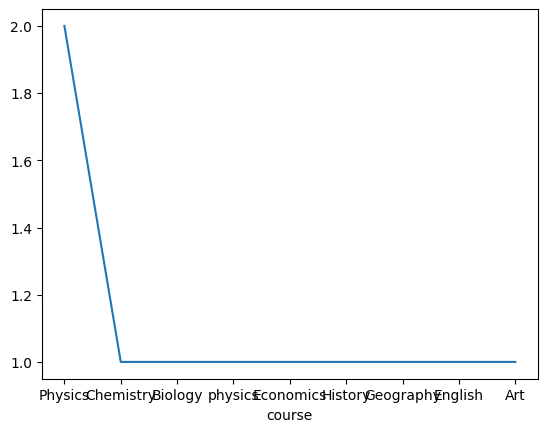

In [60]:
students_df.course.value_counts().plot()

<Axes: xlabel='course'>

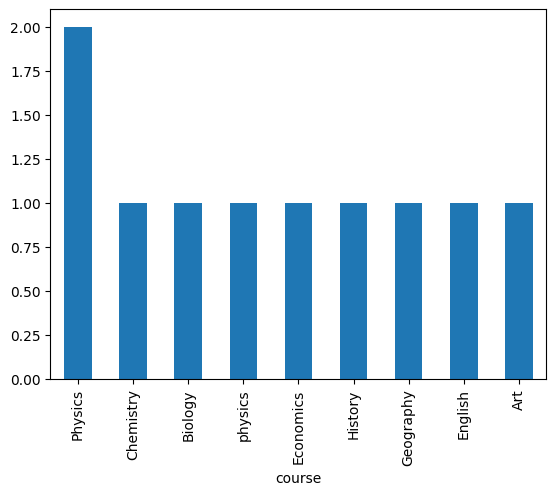

In [61]:
students_df.course.value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

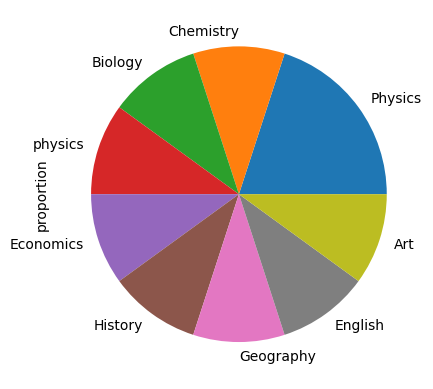

In [63]:
students_df.course.value_counts(normalize=True).plot(kind='pie')

C:\Users\Netever\AppData\Local\Temp\ipykernel_25752\489694778.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  students_df.groupby(['course'])[['fee']].aggregate([min, max, np.mean]).plot(kind='bar')
C:\Users\Netever\AppData\Local\Temp\ipykernel_25752\489694778.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  students_df.groupby(['course'])[['fee']].aggregate([min, max, np.mean]).plot(kind='bar')
C:\Users\Netever\AppData\Local\Temp\ipykernel_25752\489694778.py:1: FutureWarning: The provided callable <function mean at 0x000001B639C8F880> is currently using SeriesGroupBy.mean. In a future version of pandas, the pro

<Axes: xlabel='course'>

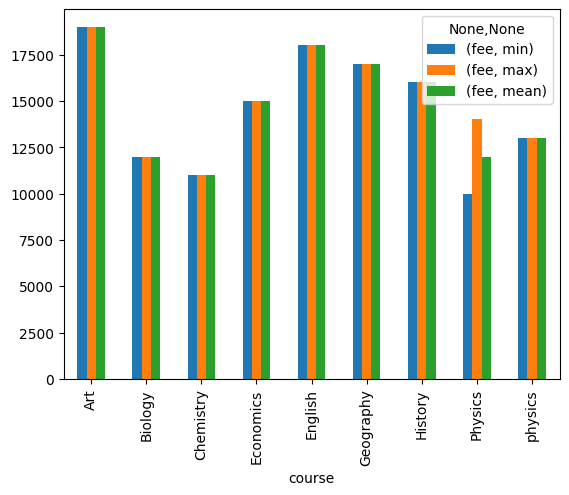

In [65]:
students_df.groupby(['course'])[['fee']].aggregate([min, max, np.mean]).plot(kind='bar')

## Data Wrangling

* .merge
* .join
* pd.concat([df1, df2])

joining

* left join
* right join
* inner join
* outer join
* cross join

https://www.w3schools.com/sql/sql_join.asp

In [72]:
import pandas as pd
from typing import Union, Dict

from collections.abc import Iterator

# sample data for the `students` DataFrame

students_data: Dict[str, list[Union[str, int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'teacher_id': [101, 102, 103, 104, 105]
}

students: pd.DataFrame = pd.DataFrame(students_data)

# sample data for the `teachers` DataFrame

teachers_data: Dict[str, list[Union[str, int]]] = {
    'teacher_id': [101, 102, 103],
    'course_name': ['Physics', 'Chem', 'Maths'],
    'teacher_name': ['Mr. Smith', 'Ms. Johnson', 'Dr. Lee']
}

teachers: pd.DataFrame = pd.DataFrame(teachers_data)

# sample data fro the `student_fee` DataFrame

student_fees_data: Dict[str, list[Union[str, int]]] = {
    'student_id': [1, 2, 3, 4, 5],
    'fee_paid': [1500, 1500, 1500, 1500, 1500]
}

student_fees: pd.DataFrame = pd.DataFrame(student_fees_data)

## Joining columns properties

* same pattern of both columns.
* same data type of both columns.
* name can be different (columns).

* Merg
    * on
    * left_on
    * right_on
    * left_index=True
    * right_index=True
    * how
        * joining types
        * left
        * right
        * inner
        * outer
        * cross

In [75]:
students

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,104
4,5,Eva,105


In [74]:
teachers

,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,103,Maths,Dr. Lee


In [73]:
student_fees

,student_id,fee_paid
0,1,1500
1,2,1500
2,3,1500
3,4,1500
4,5,1500


In [76]:
students.info()
teachers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  5 non-null      int64 
 1   name        5 non-null      object
 2   teacher_id  5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   teacher_id    3 non-null      int64 
 1   course_name   3 non-null      object
 2   teacher_name  3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


In [77]:
display(students)
display(teachers)

,student_id,name,teacher_id
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103
3,4,David,104
4,5,Eva,105


,teacher_id,course_name,teacher_name
0,101,Physics,Mr. Smith
1,102,Chem,Ms. Johnson
2,103,Maths,Dr. Lee


In [79]:
df1: pd.DataFrame = pd.merge(students, teachers)

df1

,student_id,name,teacher_id,course_name,teacher_name
0,1,Alice,101,Physics,Mr. Smith
1,2,Bob,102,Chem,Ms. Johnson
2,3,Charlie,103,Maths,Dr. Lee
